<a href="https://colab.research.google.com/github/nelmalfernando/Nelmal_INSE_6220_Project/blob/main/INSE_6220_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip3 install pycaret==2.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pycaret-2.3.6-py3-none-any.whl (301 kB)
  Using cached PyYAML-5.4.1.tar.gz (175 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached mlxtend-0.22.0-py2.py3-none-any.whl (1.4 MB)
  Using cached Boruta-0.3-py3-none-any.whl (56 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.2/25.2 MB 41.6 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates fr

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


In [5]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/nelmalfernando/Nelmal_INSE_6220_Project/main/abalone.csv')

# Remove rows with null values
df = df.dropna()

df.head(25)

,Class,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [6]:
len(df.index)

4177

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Class           4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [8]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [9]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

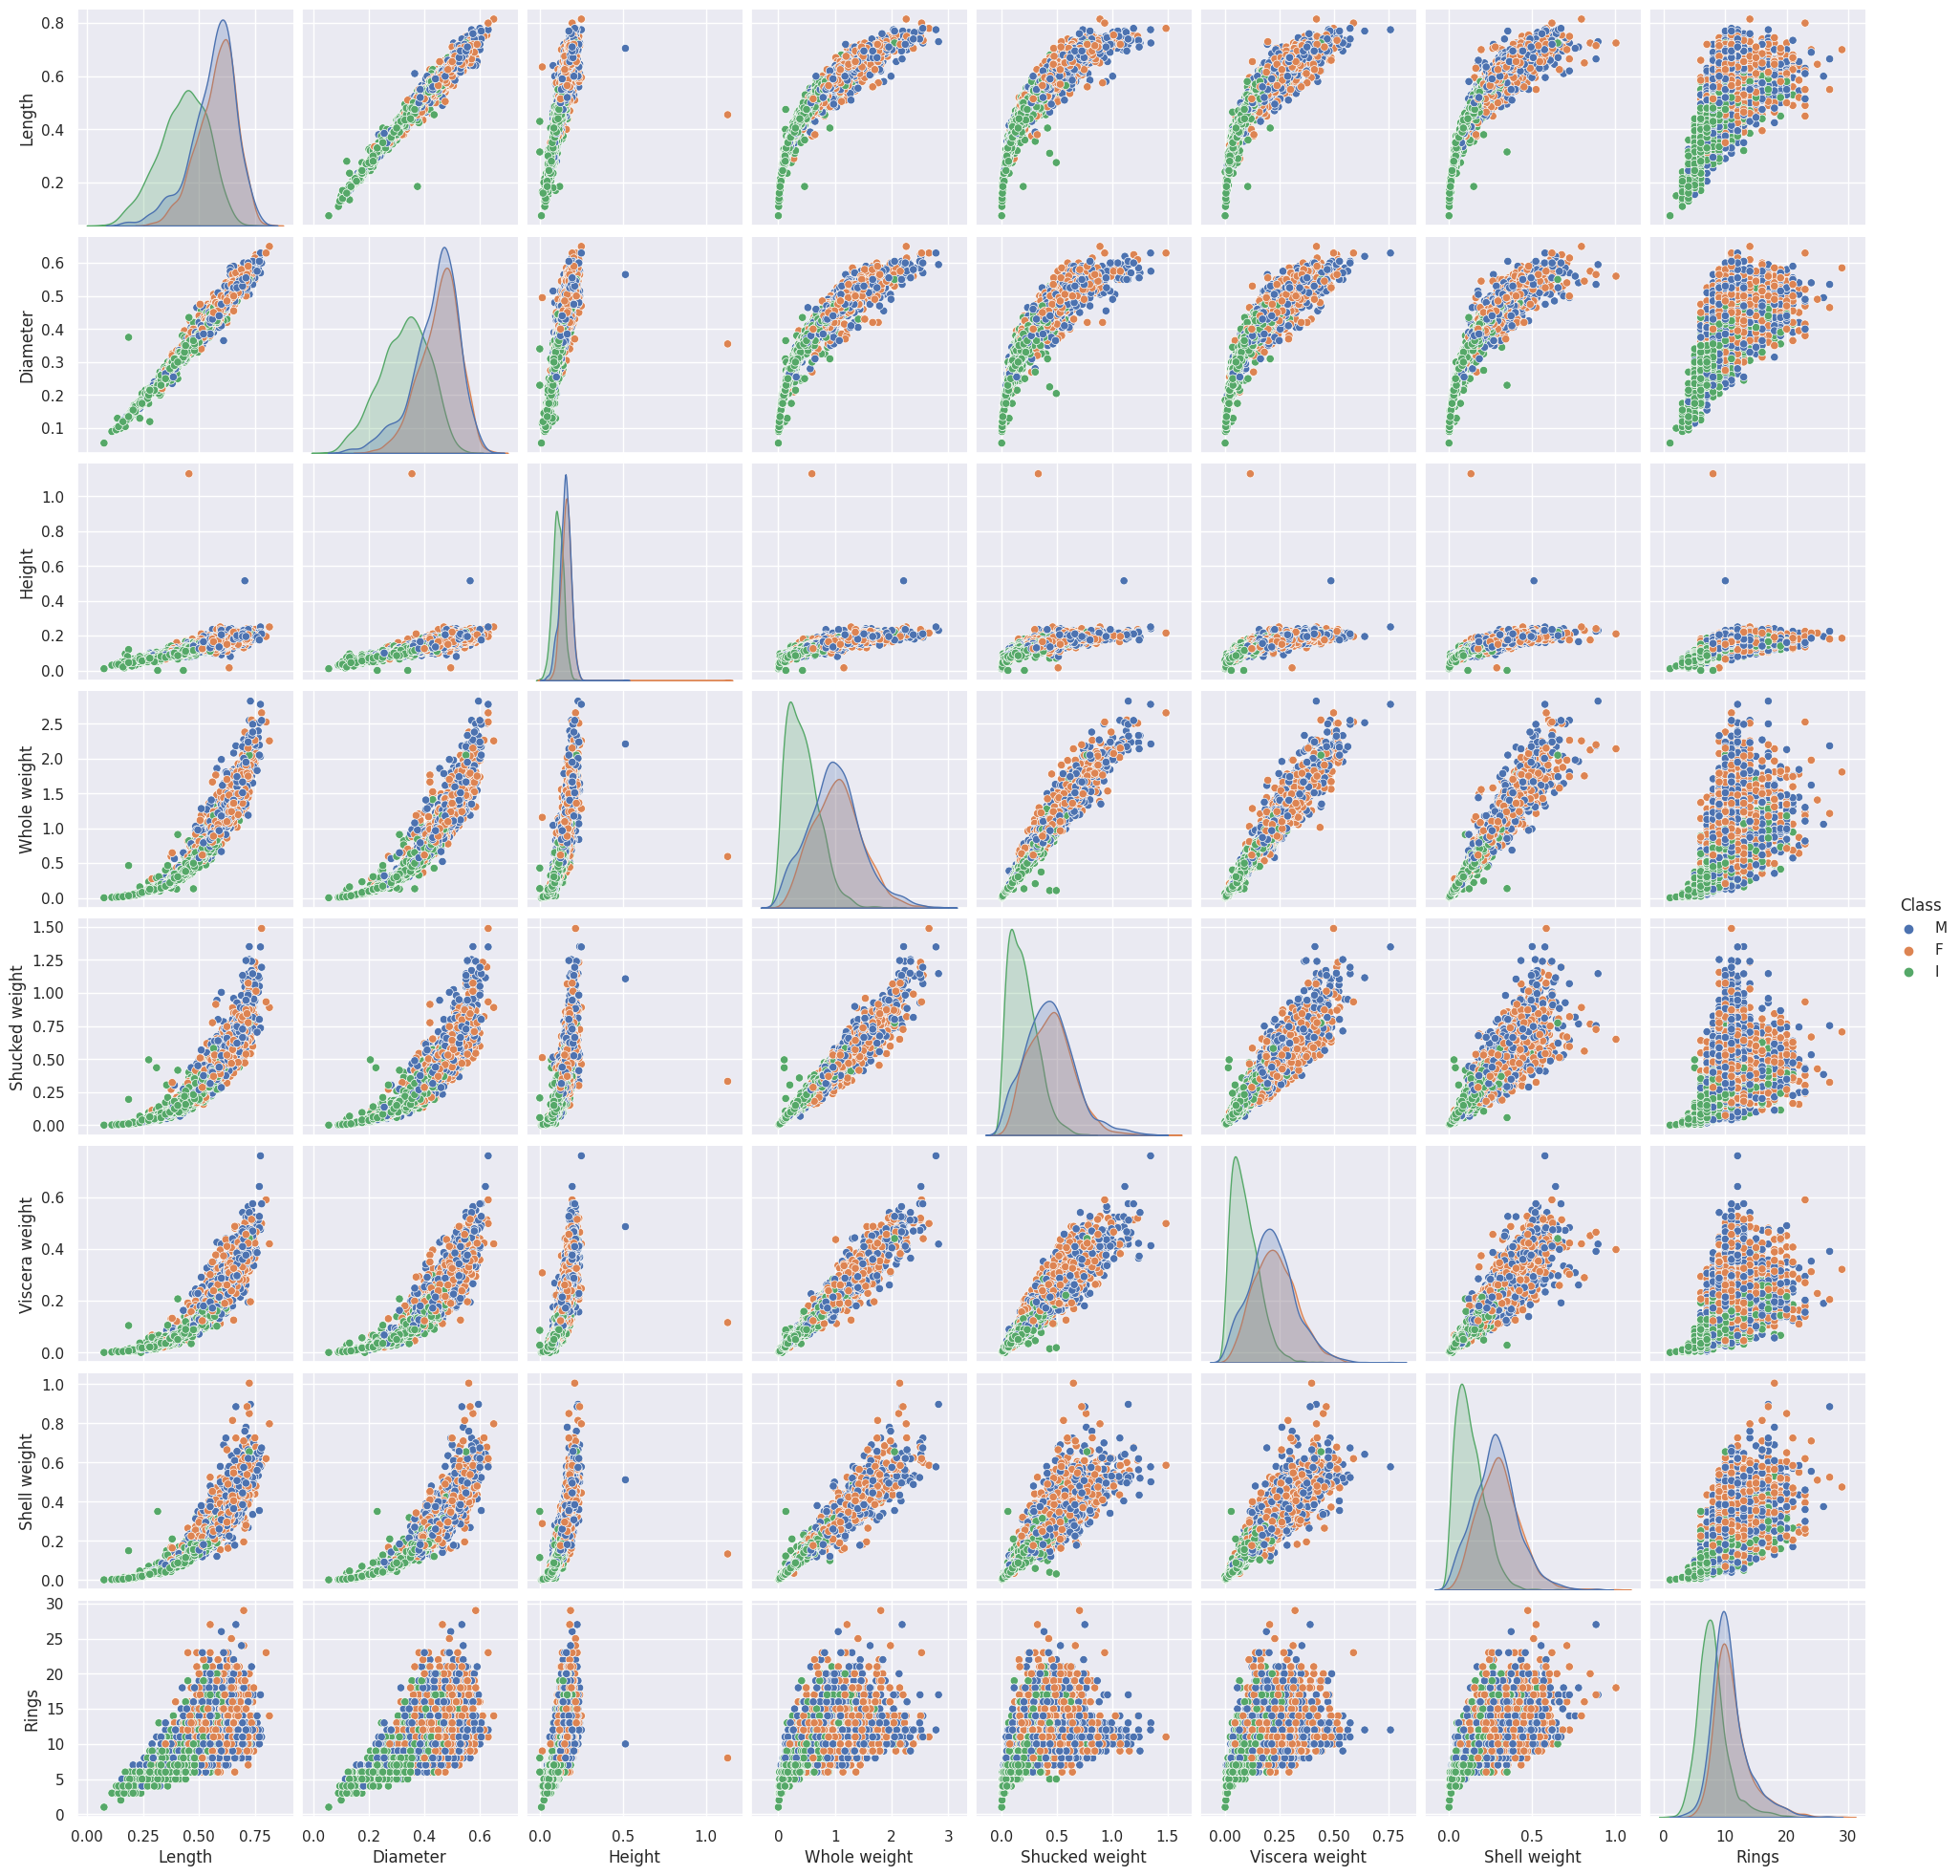

In [11]:
sns.pairplot(df, hue='Class')
plt.show()

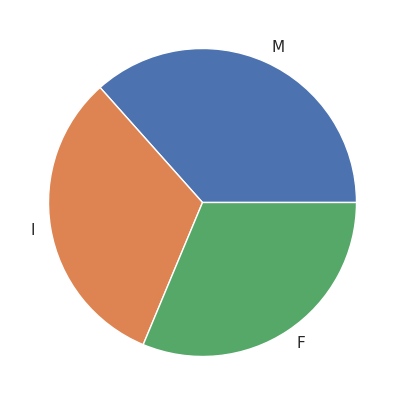

In [12]:
y =df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [13]:
X = df.drop(columns=['Class'])
X.head(10)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [14]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


**Standardize the Data**

In [15]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013
5,-0.824395,-1.087206,-1.064424,-0.973307,-0.983919,-0.940625,-0.853756,-0.599818
6,0.050033,0.071741,0.250672,-0.104505,-0.551363,-0.356690,0.655017,3.122516
7,0.174951,0.172519,-0.347099,-0.123880,-0.294533,-0.283698,0.152092,1.881738
8,-0.408000,-0.381760,-0.347099,-0.651076,-0.643732,-0.621286,-0.530447,-0.289624
9,0.216591,0.323686,0.250672,0.134109,-0.202164,-0.270012,0.583170,2.812322


In [16]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Length,4177.0,-5.834718e-16,1.00012,-3.739154,-0.616198,0.174951,0.757903,2.423480
Diameter,4177.0,-3.027929e-16,1.00012,-3.556267,-0.583316,0.172519,0.726798,2.440025
Height,4177.0,3.912493e-16,1.00012,-3.335953,-0.586208,0.011563,0.609334,23.683287
Whole weight,4177.0,9.185853e-17,1.00012,-1.686092,-0.789758,-0.059638,0.661305,4.072271
Shucked weight,4177.0,-1.020650e-17,1.00012,-1.614731,-0.781159,-0.105289,0.642673,5.085388
Viscera weight,4177.0,2.704723e-16,1.00012,-1.643173,-0.794642,-0.087532,0.660635,5.286500
Shell weight,4177.0,2.976897e-16,1.00012,-1.705134,-0.781909,-0.034708,0.647832,5.504642
Rings,4177.0,8.505419e-17,1.00012,-2.771180,-0.599818,-0.289624,0.330765,5.914268


**Observations and variables**

In [ ]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

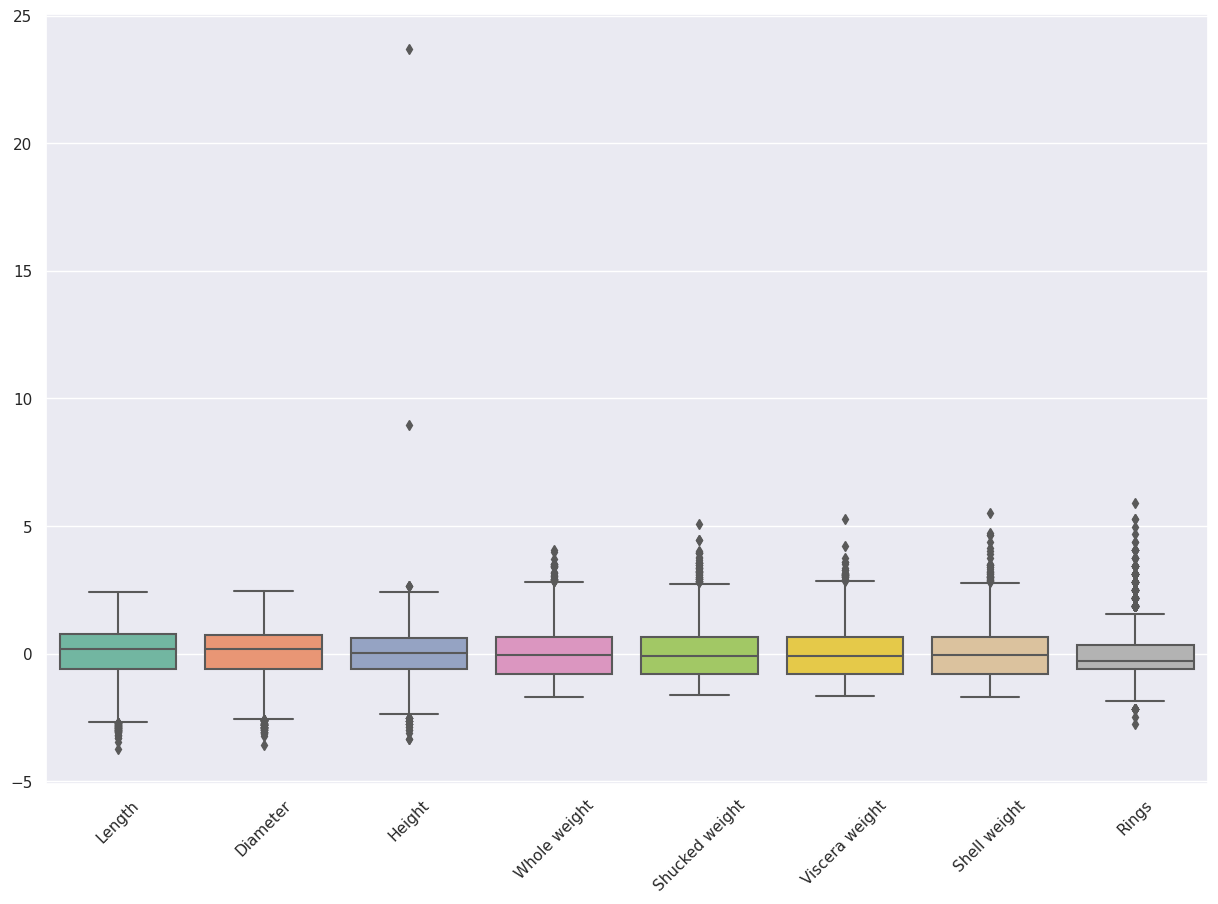

In [ ]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


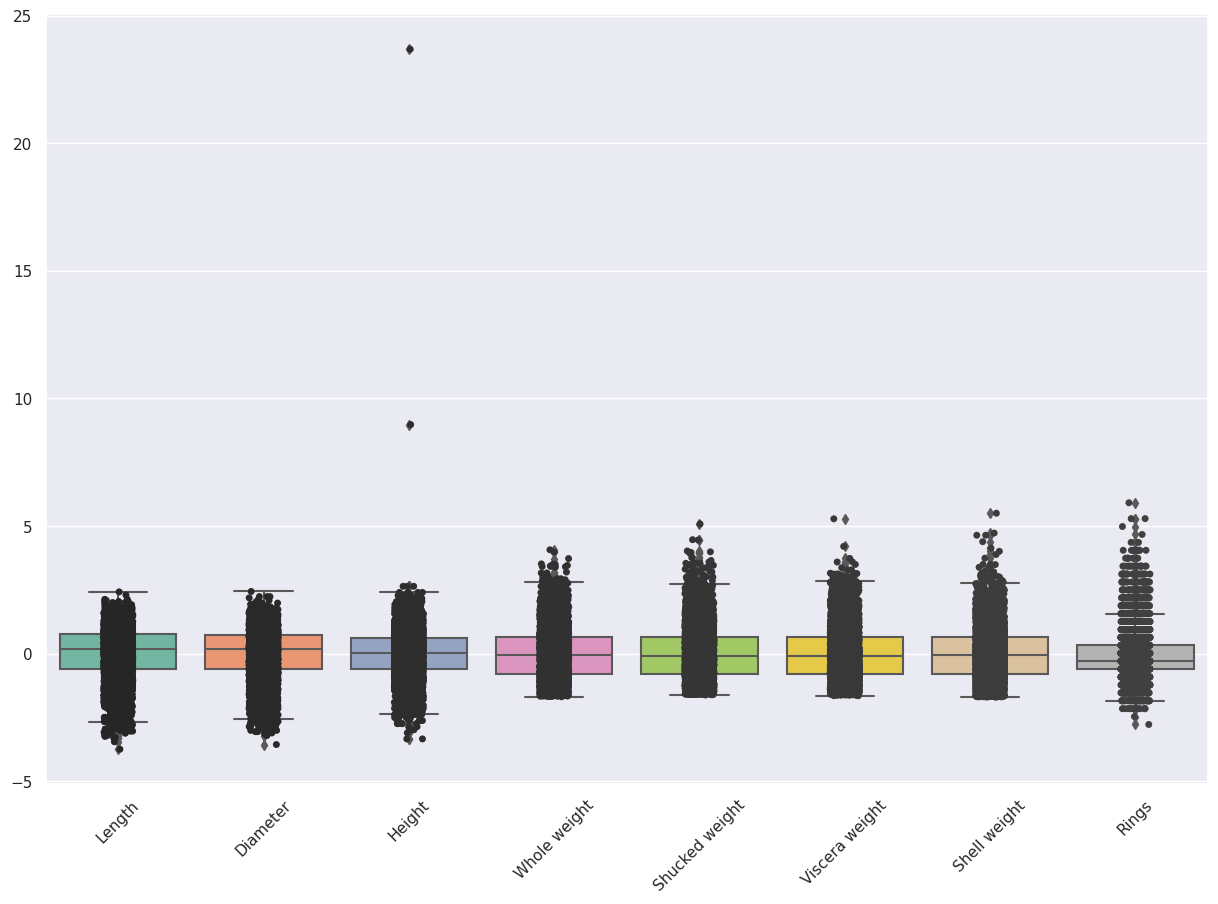

In [ ]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()

ax = plt.figure(figsize=(15,10))    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

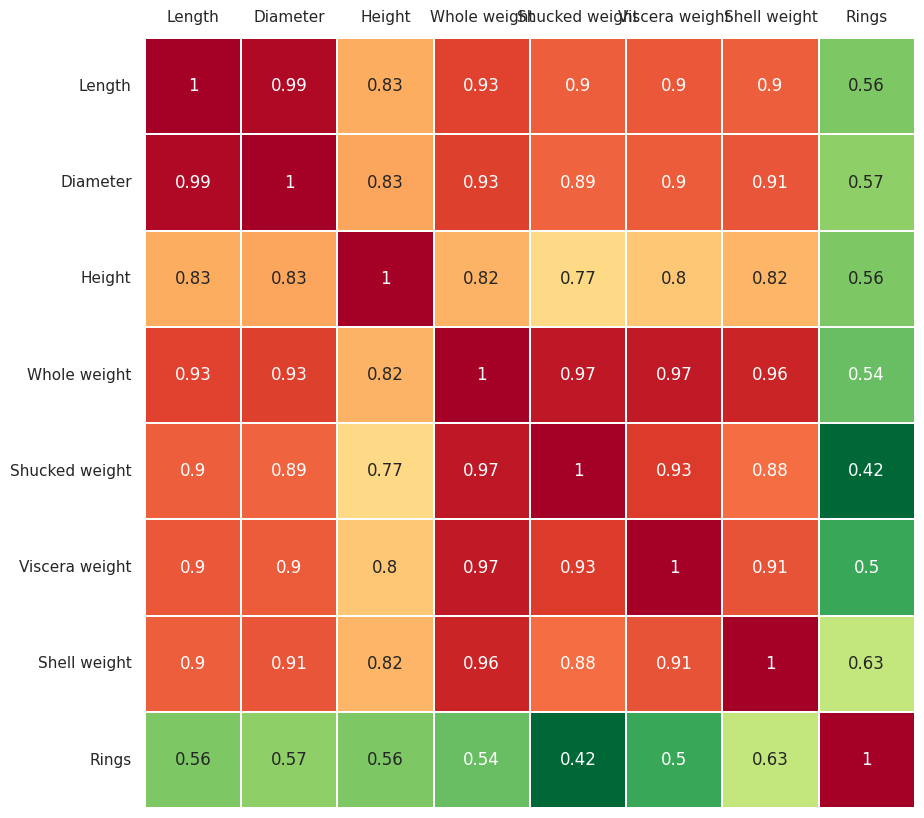

In [ ]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

## **Principal Component Analysis (PCA)**

Text(0, 0.5, 'Z2')

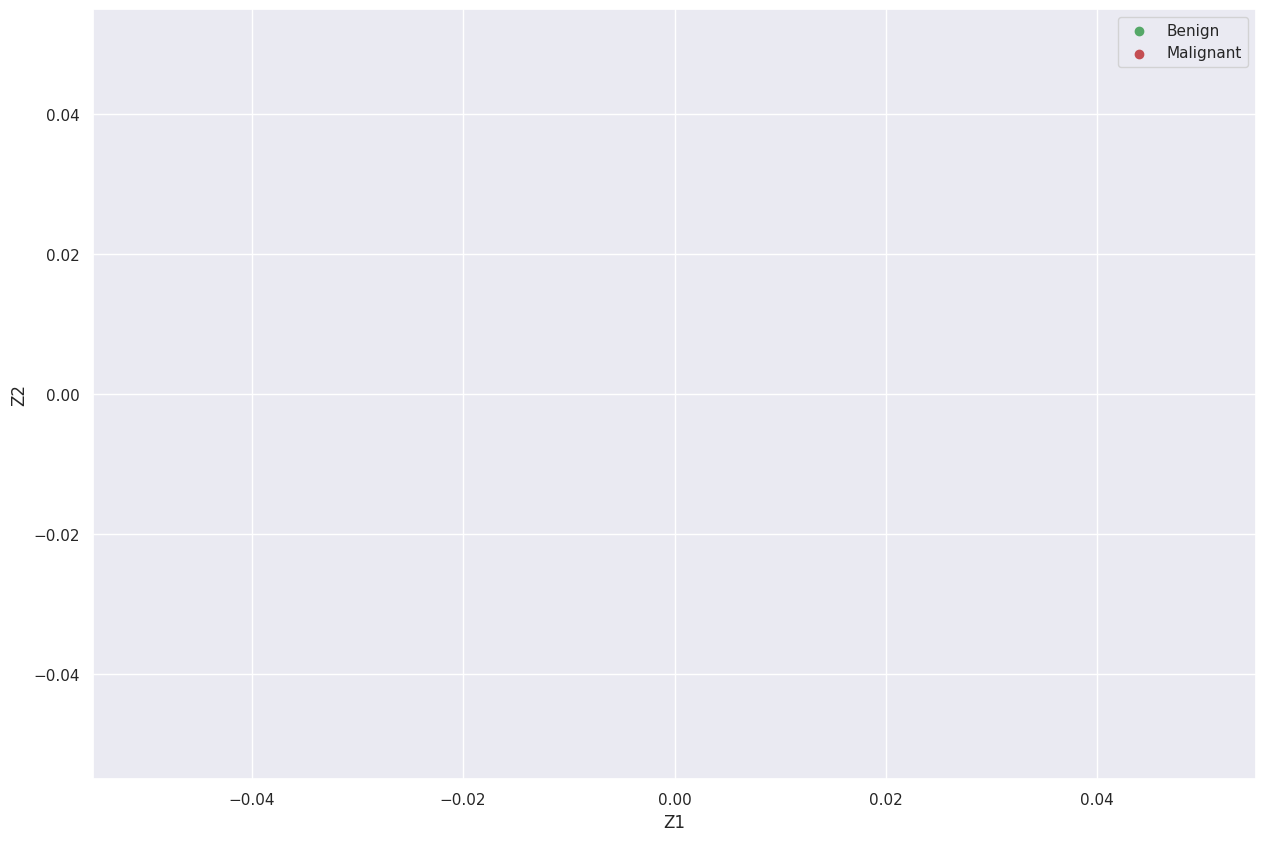

In [ ]:
pca = PCA()
Z = pca.fit_transform(X)

# (Malignant)->1,  (Benign)->0

idx_Benign= np.where(y == 0)
idx_Malignant = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_Benign,0], Z[idx_Benign,1], c='g', label='Benign')
plt.scatter(Z[idx_Malignant,0], Z[idx_Malignant,1], c='r', label='Malignant')


plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')

**Eigenvectors**

array([[ 3.72138505e-01, -6.82826958e-02,  3.10703159e-02,
        -6.04053517e-01, -1.11248478e-02, -4.74968278e-02,
        -6.98825733e-01, -1.63485531e-02],
       [ 3.73094111e-01, -4.00480412e-02,  4.10050673e-02,
        -5.87594701e-01,  5.79110156e-02, -2.33754046e-02,
         7.12985166e-01,  2.19254893e-04],
       [ 3.40026777e-01,  7.04631477e-02,  8.99705624e-01,
         2.56777039e-01, -5.67292650e-02,  2.66914622e-02,
        -8.61445194e-03, -2.68817140e-03],
       [ 3.78307478e-01, -1.37346192e-01, -2.06193609e-01,
         2.41848954e-01,  1.56556128e-02,  1.17255046e-01,
         8.33128844e-03, -8.50264371e-01],
       [ 3.62454487e-01, -2.98839921e-01, -2.08286301e-01,
         1.83245659e-01, -3.98525300e-01,  6.24892864e-01,
         9.28176619e-03,  3.91100542e-01],
       [ 3.68557801e-01, -1.72978517e-01, -1.97379538e-01,
         2.65220563e-01, -3.09821489e-01, -7.65843810e-01,
         2.73455394e-02,  2.04179031e-01],
       [ 3.70757823e-01,  4.540040

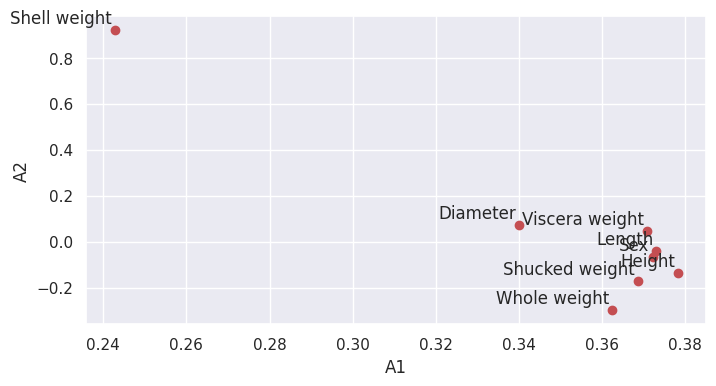

In [ ]:
A = pca.components_.T 
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

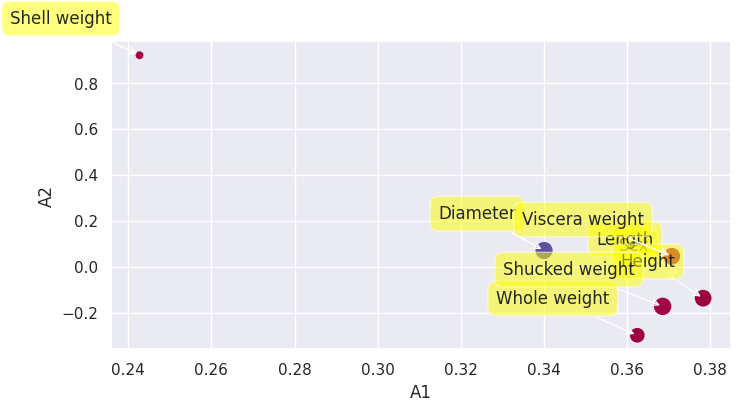

In [ ]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree Plot**

Explained variance by number of components:
Component 1: 83.91%
Component 2: 8.70%
Component 3: 3.23%
Component 4: 2.07%
Component 5: 1.06%
Component 6: 0.79%
Component 7: 0.16%
Component 8: 0.08%


array([6.71404654e+00, 6.95779541e-01, 2.58505008e-01, 1.66029591e-01,
       8.49700060e-02, 6.34879663e-02, 1.26972036e-02, 6.39985662e-03])

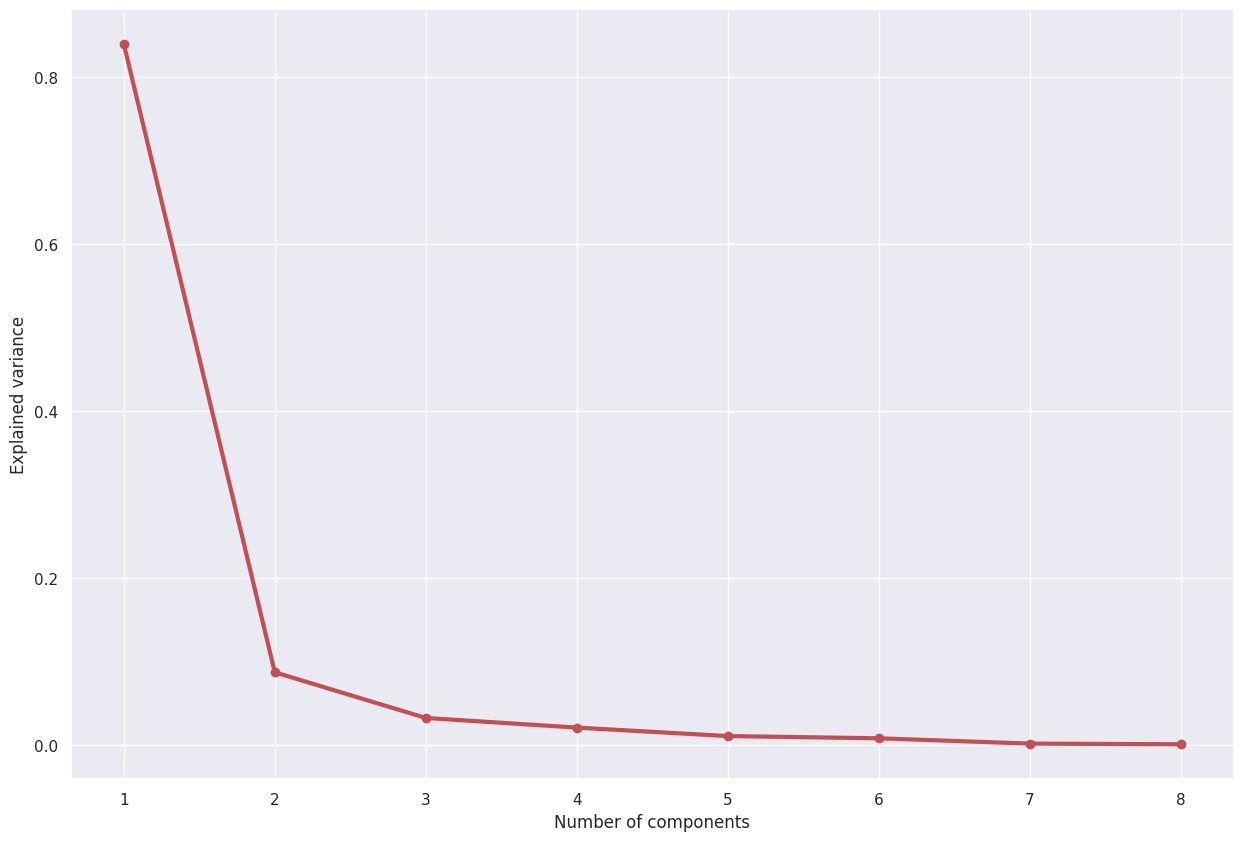

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_ 

explained_var = Lambda / sum(Lambda)
print("Explained variance by number of components:")
for i, var in enumerate(explained_var):
    print("Component {}: {:.2%}".format(i+1, var))

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

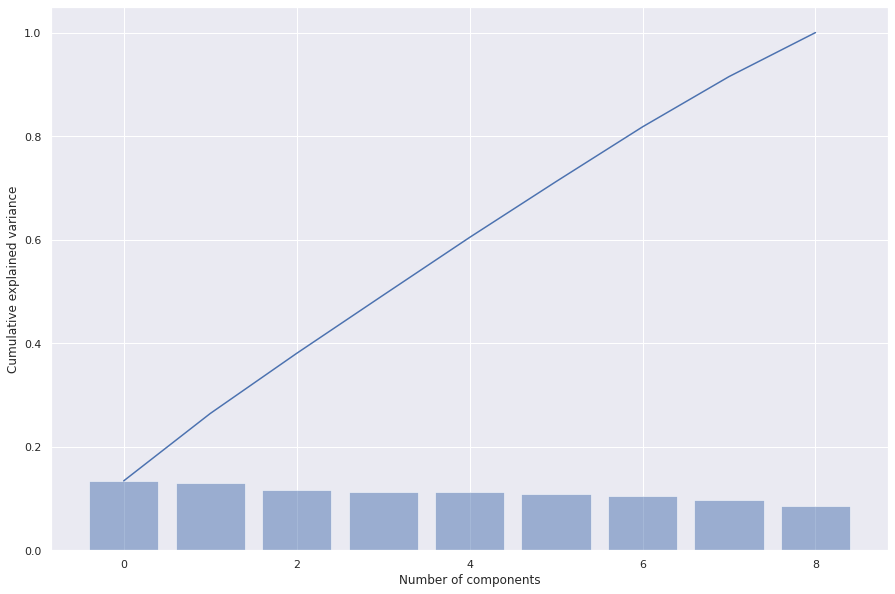

In [ ]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Bi plot**

array([-0.12034861, -0.28366897,  0.52176466, ...,  0.013148  ,
        0.6414265 ,  0.41842428])

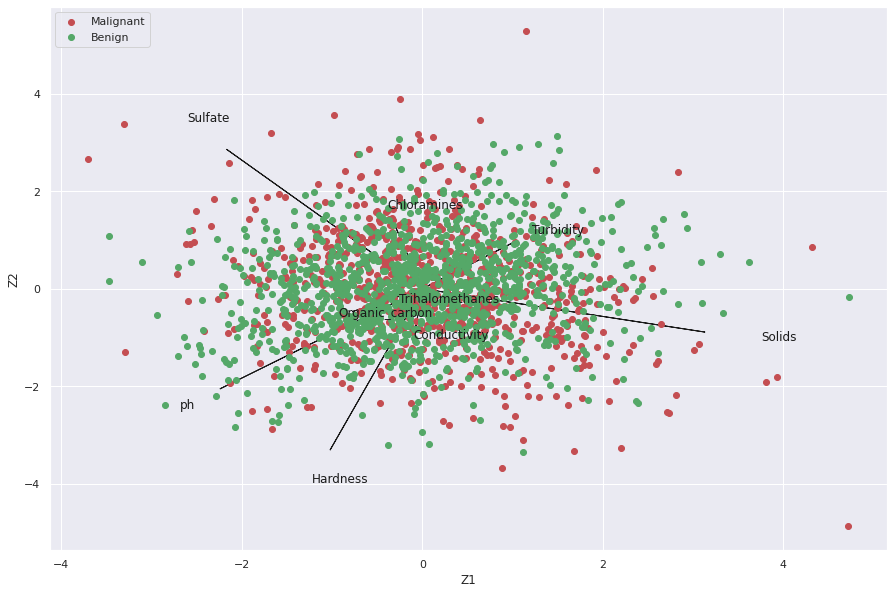

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('Z1')
plt.ylabel('Z2')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Malignant,0], Z[idx_Malignant,1], c='r', label='Malignant')
plt.scatter(Z[idx_Benign,0], Z[idx_Benign,1], c='g', label='Benign')

plt.legend(loc='upper left')
Z1
Z2

## **Using PCA Library**

In [ ]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=1b2048b579cf99508efb190f64f667f5485102347aa866b412325353ec022104
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [9] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [9] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [9] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[9]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [ ]:
out['PC']

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-0.892775,-0.120349,-0.699173,-1.041457,-0.634642,-1.683917,-1.575579,-0.060240,-0.885899
1,-0.254284,-0.283669,0.306222,1.742431,0.947493,0.912515,-0.003907,1.290650,1.119344
2,1.052120,0.521765,-1.494034,-0.319245,2.348544,1.454426,0.762159,0.002524,-0.157759
3,-1.806796,-1.101505,-1.306046,-1.275221,1.672606,0.222297,-0.777888,0.860414,-2.138292
4,-0.487809,-1.111868,0.642654,0.654000,-0.638950,1.192423,-0.914109,-0.023684,1.088139
...,...,...,...,...,...,...,...,...,...
2006,-0.461479,-0.752429,-0.561259,1.550124,0.090784,1.026308,-1.003589,0.389498,0.520581
2007,-0.130748,-0.189528,0.149927,1.321942,2.198891,-0.569759,0.911437,-0.144283,0.962709
2008,1.337752,0.013148,0.375630,0.536474,0.042330,-1.184213,0.216151,4.736421,1.584403
2009,0.576312,0.641426,-0.326273,0.072135,0.397207,0.479178,0.604659,0.047402,-0.383446


**Scatter Plot**

[colourmap]> Warning: Colormap [Set1] can not create [2011] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [2011] unique colors! Available unique colors: [9].
[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


(<Figure size 1440x1080 with 1 Axes>,
 <Axes: title={'center': '9 Principal Components explain [99.99%] of the variance'}, xlabel='PC1 (13.4% expl.var)', ylabel='PC2 (13.0% expl.var)'>)

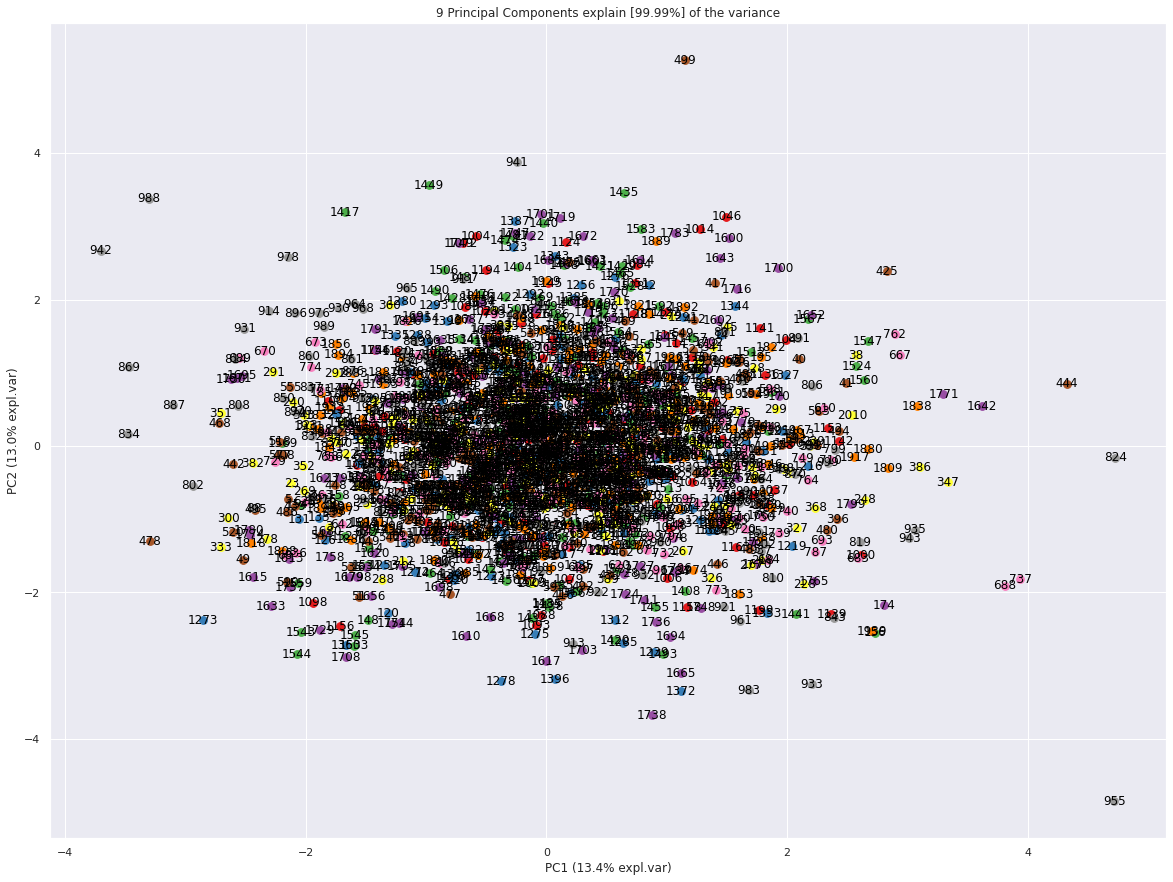

In [ ]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [ ]:
A = out['loadings'].T
A

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
ph,-0.474041,-0.388639,-0.028555,0.063505,-0.045884,0.025600,-0.269772,0.737413,0.009012
Hardness,-0.216069,-0.625870,-0.172443,0.284622,0.071333,-0.074363,0.028460,-0.476881,-0.460446
Solids,0.662256,-0.168219,0.118152,-0.155661,0.126732,-0.057698,0.003052,0.373143,-0.579908
Chloramines,-0.067800,0.259787,-0.594435,0.171428,-0.118862,-0.500588,0.453283,0.233114,-0.143699
Sulfate,-0.458634,0.541464,0.242405,-0.030758,0.047739,0.155684,-0.059880,-0.013975,-0.637548
Conductivity,-0.016645,-0.160847,0.370548,0.031634,-0.747959,0.154235,0.497472,0.046879,-0.051365
Organic_carbon,-0.163825,-0.088683,0.515495,-0.251032,0.108308,-0.784196,0.017432,-0.070953,0.067178
Trihalomethanes,-0.046201,-0.044344,-0.367579,-0.696504,-0.452067,-0.070450,-0.353397,-0.160765,-0.124920
Turbidity,0.214065,0.180482,0.072251,0.557905,-0.429884,-0.268226,-0.587096,-0.044226,-0.041732


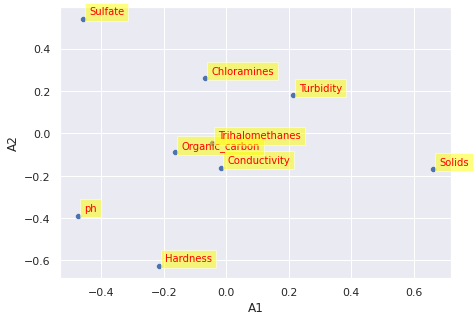

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('A1')
plt.ylabel('A2')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))
 

**Scree Plot**

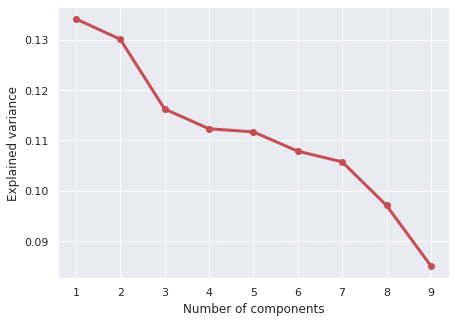

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

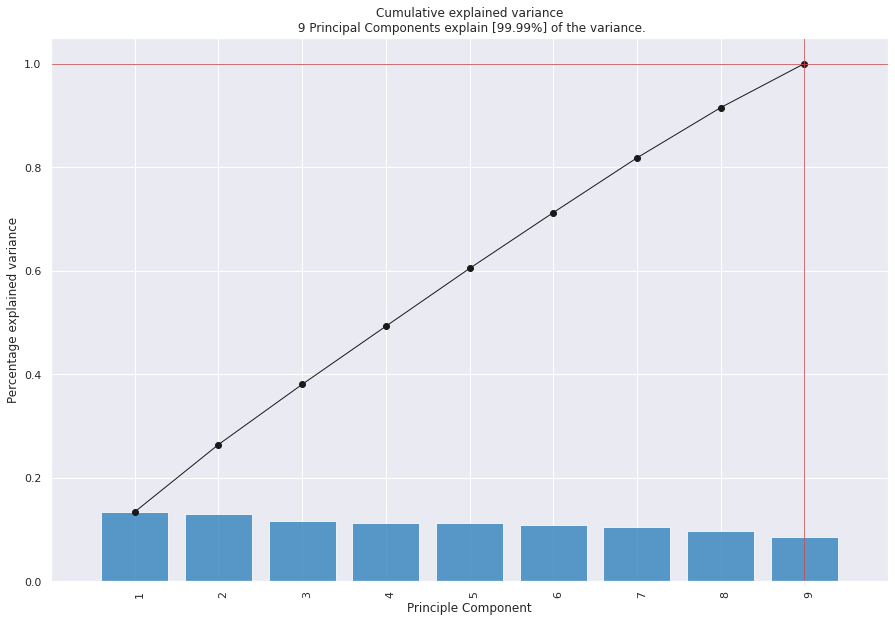

<Figure size 504x360 with 0 Axes>

In [ ]:

model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [2011] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [2011] unique colors! Available unique colors: [9].
[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


(<Figure size 1080x720 with 1 Axes>,
 <Axes: title={'center': '9 Principal Components explain [99.99%] of the variance'}, xlabel='PC1 (13.4% expl.var)', ylabel='PC2 (13.0% expl.var)'>)

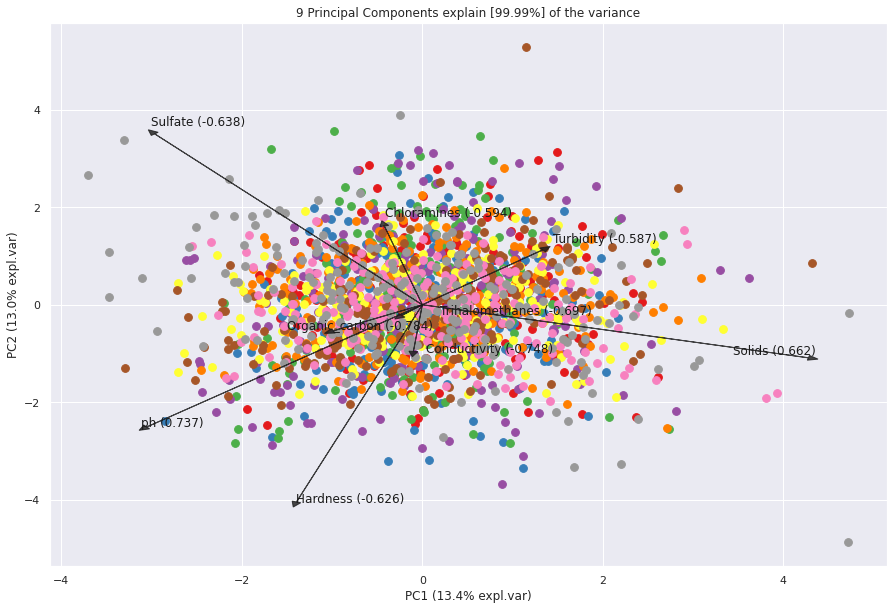

In [ ]:
model.biplot(label=False, legend=False, color_arrow='k')

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [2011] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [2011] unique colors! Available unique colors: [9].
[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


(<Figure size 1080x720 with 1 Axes>,
 <Axes3D: title={'center': '9 Principal Components explain [99.99%] of the variance'}, xlabel='PC1 (13.4% expl.var)', ylabel='PC2 (13.0% expl.var)', zlabel='PC3 (11.6% expl.var)'>)

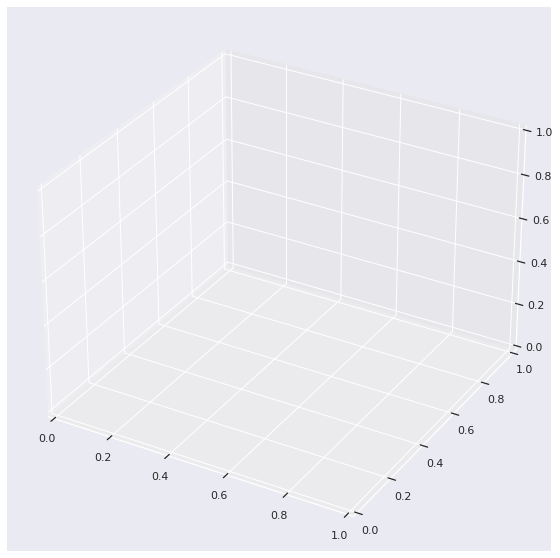

In [ ]:
model.biplot3d(legend=False)